## **Step 0: Import Tools**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

pd.set_option('display.max_columns', 500)

In [107]:
%%capture

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itsno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [142]:
%%capture

pip install requests

In [144]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [121]:
import requests

import string

## **Step 0.5: Test the API**

In [74]:
# We make a request to the Chuck Norris API to get a random joke

url = "https://api.chucknorris.io/jokes/random" 
response = requests.get(url)

# We use conditional logic to determine whether a joke was successfully obtained 

# If the request was successful, it will print a joke, if not it will print an error messgae as specified 

if response.status_code == 200:
    joke_data = response.json()
    joke = joke_data['value']
    print(joke)
else:
    print("Failed to retrieve Chuck Norris joke.")
    

Chuck Norris was banned from competitive bull riding after a 1992 exhibition in San Antonio, in which he rode a brahma bull 1,746 miles from Texas to Milwaukee, Wisconsin to pick up his dry cleaning.


## **Step 1: Import Data**

In [160]:
# We are going to retrieve 100 jokes from the API and store them in a dataframe

url = "https://api.chucknorris.io/jokes/random"
jokes = []

for _ in range(100):
    response = requests.get(url)
    if response.status_code == 200:
        joke_data = response.json()
        joke = joke_data['value']
        jokes.append(joke)

df = pd.DataFrame(jokes, columns=['Joke'])

In [161]:
print(df)

                                                 Joke
0   Chuck Norris doesn't eat honey. He chews on bees.
1                Chuck Norris can lick his own elboe.
2            Chuck Norris' bedroom has leather walls.
3       Chuck Norris splits firewood with his shlong.
4   Chuck Norris insists on strongly-typed program...
..                                                ...
95                     Chuck Norris drives to Hawaii.
96  It was going to be called 'Expendables 2: The ...
97  Android built an app for Chuck Norris before h...
98  Little known fact: the greatest taste sensatio...
99  Chuck Norris has to 'dumb it down' when chatti...

[100 rows x 1 columns]


## **Step 2: Data Understanding**

In [80]:
df.shape

(100, 1)

In [83]:
df.head(5)

,Joke
0,Chuck Norris really doesn't need the Total Gym...
1,Jack Kevorkian was a doctor that assisted peop...
2,Chuck Norris invented facial piercings back in...
3,Staring at Chuck Norris photos has been known ...
4,Question: Which of the following is most likel...


In [84]:
df.columns

Index(['Joke'], dtype='object')

In [110]:
df.dtypes

Joke    object
dtype: object

In [86]:
df.describe()

,Joke
count,100
unique,100
top,Chuck Norris really doesn't need the Total Gym...
freq,1


## **Step 3: Data Preparation**

In [88]:
# Check fo null values 

df.isna().sum()

Joke    0
dtype: int64

In [89]:
# Check for duplicated columns 

df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [90]:
# Check for duplicated columns

df.loc[df.duplicated()]

,Joke


In [102]:
# Check for duplicated jolkes in the "Joke" column

duplicates = df.duplicated(subset='Joke')

num_duplicates = duplicates.sum()

print("Total duplicates:", num_duplicates)


Total duplicates: 0


In [119]:
# We should convert the jokes to a string format in order to perform analysis later

df['Joke'] = df['Joke'].astype(str)

## **Step 4: Exploratory Data Analysis**

Most common words: [('chuck', 108), ('norris', 107), ('get', 8), ('kick', 6), ('people', 5), ('roundhouse', 5), ('would', 4), ('invented', 4), ('first', 4), ('ass', 4)]


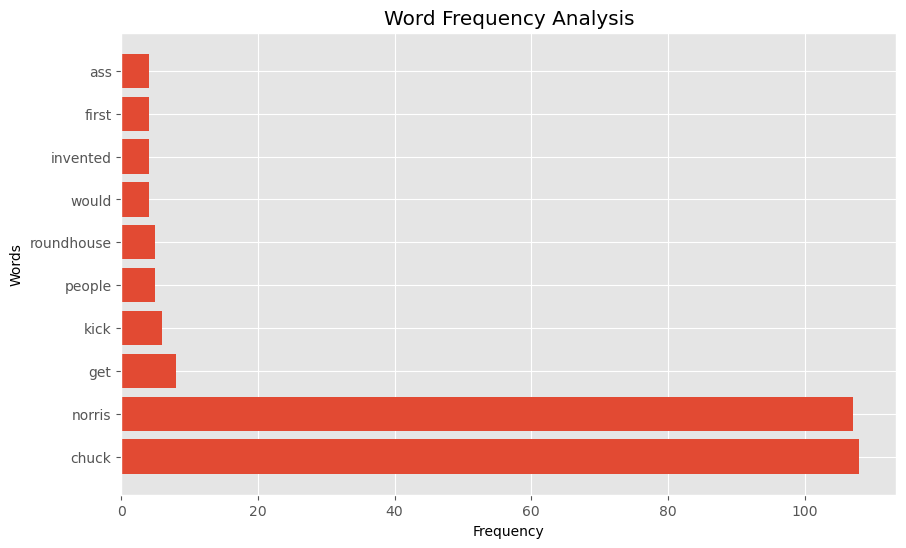

In [137]:
# Word Frequency Analysis 

# Tokenize the jokes
tokens = []
for joke in df['Joke']:
    tokens.extend(word_tokenize(joke))

# Remove specific words
tokens = [token.lower() for token in tokens if token.lower() not in ["n't", "'s", "''", '"','``','ca']]

# Remove punctuation
tokens = [token for token in tokens if token not in string.punctuation]

# Remove stop words
stop_words = set(stopwords.words("english"))
tokens = [token for token in tokens if token.lower() not in stop_words]

# Count word frequency
word_freq = Counter(tokens)

# Get the most common words and their frequencies
common_words = word_freq.most_common(10)
print("Most common words:", common_words)

# Plot word frequency
words, frequencies = zip(*common_words)
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.barh(words, frequencies)  # Horizontal bar plot
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Word Frequency Analysis")
plt.show()


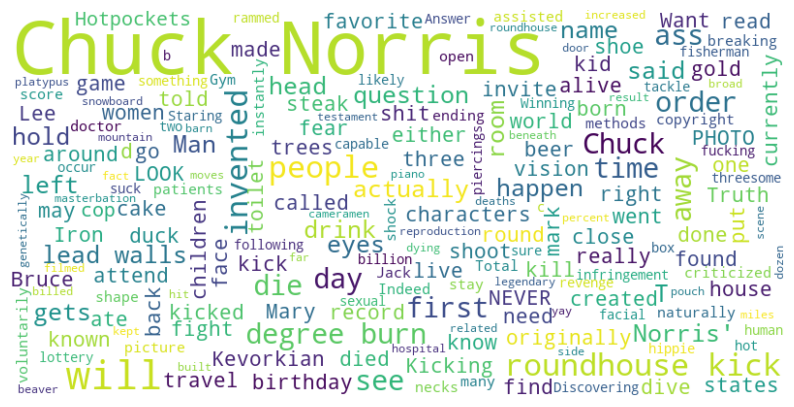

In [147]:
# WordCloud 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the jokes into a single string
all_jokes = ' '.join(df['Joke'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_jokes)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [149]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 12.2/12.2 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 2.4 MB/s eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 94.7/94.7 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 480.9/480.9 kB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 5.1 MB/s eta 0:00:00


In [152]:
import spacy
import pandas as pd

# Download and install the English language model
!python -m spacy download en_core_web_sm

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Rest of your code...


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.8/12.8 MB 3.3 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [156]:
import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Perform NER on the jokes
ner_results = []
for joke in df["Joke"]:
    doc = nlp(joke)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    ner_results.append(entities)

# Add NER results to the DataFrame
df["NER"] = ner_results

# Display the DataFrame with NER results
print(df)


KeyError: 'Joke'

In [158]:
print(df.columns)


RangeIndex(start=0, stop=1, step=1)


In [159]:
print(df)

      0
0  Joke


In [162]:
import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Create a new DataFrame for NER results
ner_df = pd.DataFrame()

# Perform NER on the jokes
ner_results = []
for joke in df["Joke"]:
    doc = nlp(joke)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    ner_results.append(entities)

# Add NER results to the new DataFrame
ner_df["Joke"] = df["Joke"]
ner_df["NER"] = ner_results

# Display the new DataFrame with NER results
print(ner_df)


                                                 Joke  \
0   Chuck Norris doesn't eat honey. He chews on bees.   
1                Chuck Norris can lick his own elboe.   
2            Chuck Norris' bedroom has leather walls.   
3       Chuck Norris splits firewood with his shlong.   
4   Chuck Norris insists on strongly-typed program...   
..                                                ...   
95                     Chuck Norris drives to Hawaii.   
96  It was going to be called 'Expendables 2: The ...   
97  Android built an app for Chuck Norris before h...   
98  Little known fact: the greatest taste sensatio...   
99  Chuck Norris has to 'dumb it down' when chatti...   

                                                  NER  
0                            [(Chuck Norris, PERSON)]  
1                            [(Chuck Norris, PERSON)]  
2                           [(Chuck Norris', PERSON)]  
3                            [(Chuck Norris, PERSON)]  
4                            [(Chuc

In [163]:
# Collect all NER types in a list
ner_types = []
for entities in ner_results:
    for entity, label in entities:
        ner_types.append(label)

# Remove duplicates and sort the list
ner_types = sorted(list(set(ner_types)))

# Print the list of NER types
print("NER Types:", ner_types)


NER Types: ['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERSON', 'QUANTITY', 'TIME']


In [164]:
from collections import Counter

# Collect all NER types in a list
ner_types = []
for entities in ner_results:
    for entity, label in entities:
        ner_types.append(label)

# Count the frequency of each NER type
ner_type_counts = Counter(ner_types)

# Print the frequency of each NER type
for ner_type, count in ner_type_counts.items():
    print(f"NER Type: {ner_type}, Count: {count}")


NER Type: PERSON, Count: 131
NER Type: ORDINAL, Count: 3
NER Type: QUANTITY, Count: 3
NER Type: ORG, Count: 11
NER Type: DATE, Count: 6
NER Type: NORP, Count: 3
NER Type: CARDINAL, Count: 13
NER Type: FAC, Count: 2
NER Type: LANGUAGE, Count: 2
NER Type: GPE, Count: 3
NER Type: EVENT, Count: 1
NER Type: LOC, Count: 1
NER Type: TIME, Count: 1
NER Type: MONEY, Count: 1
